In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# 2-class data를 만들기 위해 각각 mean vector, cov matrix를 다르게 설정
mean1 = [2,4]
cov1 = [[2,3],[3,7]]

mean2 = [-2,-4]
cov2 = [[2,3],[3,7]]

In [14]:
# Numpy의 random 함수로 각각 평균 근처에서 가상 데이터 생성(만들어진 mean, cov를 바탕으로 input 데이터 생성)
x1 = np.random.multivariate_normal(mean1, cov1, 500)
x2 = np.random.multivariate_normal(mean2, cov2, 500)

In [15]:
# 각 클래스에 clss label 생성
y1 = np.ones(500)
y2 = -1*np.ones(500)

In [16]:
# 잘 생성되었는지 확인(전체 행과 열을 확인)
print(x1.shape)
print(x2.shape)
print(y1.shape)
print(y2.shape)

(500, 2)
(500, 2)
(500,)
(500,)


In [17]:
# 만들어진 두 클래스의 데이터를 합침
datax = np.concatenate((x1,x2), axis=0)
datay = np.concatenate((y1,y2), axis=0)

In [18]:
# 잘 합쳐졌는지 확인(전체 행과 열을 확인)
print(datax.shape)
print(datay.shape)

(1000, 2)
(1000,)


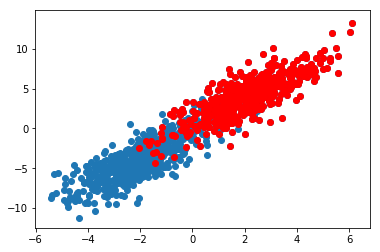

In [19]:
# 잘 만들어졌나 그림으로 확인
plt.scatter(datax[:,0], datax[:,1])
plt.scatter(x1[:,0], x1[:,1], c="red")

In [20]:
# 학습을 하기 위해 train:test로 나누어 줌(7:3)
n_data = datax.shape[0]
p_trn = 0.7 # percentage of train data
n_trn = round(n_data*p_trn) # number of train data
print(n_data, p_trn, n_trn)

idx_array = np.array(range(0,n_data)) # index array
idx_array_perm = np.random.permutation(idx_array) # permutation함수: 데이터를 뒤섞어줌
print(idx_array_perm[0:100])

# 학습/평가 데이터 분할
trnx = datax[idx_array_perm[0:n_trn],:]
trny = datay[idx_array_perm[0:n_trn]]
tstx = datax[idx_array_perm[n_trn:n_data],:]
tsty = datay[idx_array_perm[n_trn:n_data]]

1000 0.7 700
[291 958 740 258 445 766 242 816 925 581 500 548 886 754 619 471   2 539
 138 503 756 976 727 151 595 571 515 797 407 186 127 235 465 410 412 311
 791 119 642 966 398 723 770 306 172 783 901  68 304 713 487 765 695 260
 439 999 720 758 486 545 462 599 823 351 909 873 578 950 180 241 911 698
 970 800 309 473 386 449 688  39 399 312 750 468  30 461 316 433 685 131
 113 491 834 378  79 264 761 206   3 639]


In [21]:
# 잘 분할되었나 확인(전체 행과 열을 확인)
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(700, 2)
(300, 2)
(700,)
(300,)


In [11]:
# Naive Bayesian Classifier 이용
from sklearn.naive_bayes import GaussianNB

clf_A = GaussianNB() # Classifier A 객체 생성
clf_A.fit(trnx, trny) # 학습데이터 fit -> tuning
tsty_hat_A = clf_A.predict(tstx) # predict 진행

In [12]:
# Accuracy 계산
dif = tsty - tsty_hat_A 
accuracy_A = 1 - (np.size(np.where(dif != 0))/np.size(tsty)) # np.where: 특정 값을 가지는 Index를 반환해주는 중요한 함수
print(accuracy_A)

0.9266666666666666


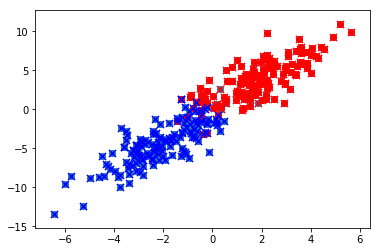

In [13]:
# 그림으로 결과를 확인
# 실제 label(동그라미) vs 예측된 label(X 마크)
plt.scatter(tstx[:,0], tstx[:,1])
plt.scatter(tstx[np.where(tsty==1),0], tstx[np.where(tsty==1),1], c="red")
plt.scatter(tstx[np.where(tsty_hat_A==1),0], tstx[np.where(tsty_hat_A==1),1], c="red", marker='x', s=50)
plt.scatter(tstx[np.where(tsty_hat_A==-1),0], tstx[np.where(tsty_hat_A==-1),1], c="blue", marker='x',s=50)

In [14]:
# Classifier B -> prior 변경
clf_B = GaussianNB(priors=[0.7, 0.3])
clf_B.fit(trnx, trny)
tsty_hat_B = clf_B.predict(tstx)

In [15]:
# Accuracy 계산
dif = tsty - tsty_hat_B
accuracy_B = 1 - (np.size(np.where(dif != 0))/np.size(tsty))
print(accuracy_B)

0.9166666666666666


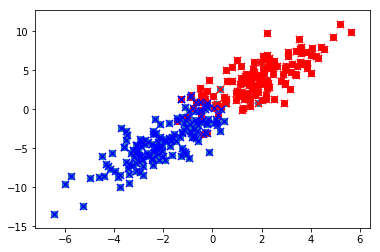

In [16]:
# 그림으로 결과를 확인
# 실제 label(동그라미) vs 예측된 label(X 마크)
plt.scatter(tstx[:,0], tstx[:,1])
plt.scatter(tstx[np.where(tsty==1),0], tstx[np.where(tsty==1),1], c="red")
plt.scatter(tstx[np.where(tsty_hat_B==1),0], tstx[np.where(tsty_hat_B==1),1], c="red", marker='x', s=50)
plt.scatter(tstx[np.where(tsty_hat_B==-1),0], tstx[np.where(tsty_hat_B==-1),1], c="blue", marker='x',s=50)